In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pt
import plotly.express as px

In [ ]:
 !pip install pandas-profiling==2.7.1 

In [4]:
import pandas_profiling as pp

In [5]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
pp.ProfileReport(df).to_widgets()

# Preprocessing

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [8]:
imputer = SimpleImputer(missing_values=0)
scaler = StandardScaler()
state_hot_encoder = OneHotEncoder()

In [9]:
df[['R&D Spend','Marketing Spend']] = imputer.fit_transform(df[['R&D Spend','Marketing Spend']]) 

In [10]:
sorted(df.State.unique())

['California', 'Florida', 'New York']

In [11]:
state_dummies = state_hot_encoder.fit_transform(df[['State']]).toarray()
state_dummies_df = pd.DataFrame(state_dummies,columns=sorted(df.State.unique()))
state_dummies_df.head()

,California,Florida,New York
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [12]:
df = pd.concat([df,state_dummies_df.iloc[:,:-1]],axis=1)

In [13]:
df.drop(['State'],axis=1,inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0


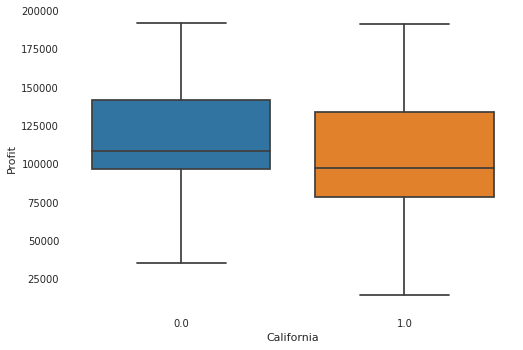

In [14]:
sns.boxplot(x='California',y='Profit',data=df)
plt.show()

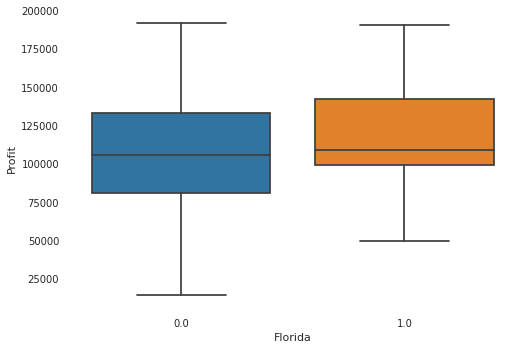

In [15]:
sns.boxplot(x='Florida',y='Profit',data=df)
plt.show()

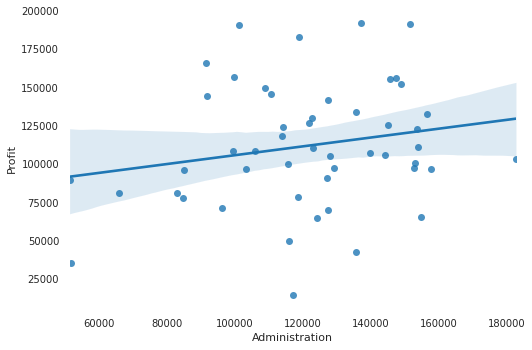

In [17]:
sns.regplot(x='Administration',y='Profit',data=df)
plt.show()

# Create a ML model

In [18]:
X = df[['R&D Spend','Marketing Spend']]
y = df['Profit']

In [19]:
scaled_x = scaler.fit_transform(X)

In [20]:
Xtrain,Xtest, ytrain, ytest = train_test_split(scaled_x, y, test_size=.2, random_state=0)

In [21]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.score(Xtest, ytest) * 100

90.33755169989442

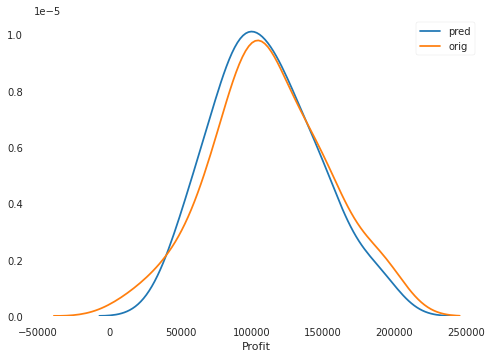

In [23]:
ypred = model.predict(Xtrain)
sns.distplot(ypred,hist=False,label='pred')
sns.distplot(y,hist=False,label='orig')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error

In [26]:
np.sqrt(mean_squared_error(ytrain, ypred))

19397.89686482325

In [27]:
ypred

array([ 95552.69370261,  88409.66014949, 102586.2527282 ,  89107.84655866,
       126476.19126333, 154878.08753078, 142518.50497505,  41764.54254797,
        59125.32678781,  93865.6918362 , 139266.50014297,  90149.76488695,
        87531.38844814, 114747.79326584,  68693.82508863, 116281.00362217,
        54256.63352038, 147298.60799776, 123286.38190944,  95675.7326855 ,
       159042.05050096, 127465.24928449,  74124.70263517,  96522.14499339,
       186277.70990212, 124329.24472811,  86419.39000322, 104265.62851858,
       142228.79122073, 110860.04692117,  76312.52656831, 117812.27960922,
       117276.51987478, 148662.95186287,  80938.44692721,  65414.16228036,
       169117.8734996 , 190354.6394617 , 110758.13282294,  58202.9687372 ])